In [86]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#KHAI BÁO TẤT CẢ THƯ VIỆN CẦN DÙNG
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [89]:
train_data = '/content/drive/MyDrive/AI/11_LoaiTien/TRAIN'
test_data =  '/content/drive/MyDrive/AI/11_LoaiTien/TEST'
val_data  =  '/content/drive/MyDrive/AI/11_LoaiTien/TEST'

In [90]:
from keras.engine.data_adapter import train_validation_split
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
train_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 202 images belonging to 11 classes.
Found 129 images belonging to 11 classes.
Found 129 images belonging to 11 classes.


In [92]:
#ĐẶT NHÃN
class_name = ['1k', '2k', '5k', '10k', '20k', '50k', '100k', '200đ', '200k','500đ', '500k']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại tien: ",train_input.num_classes)

labels:  ['1k', '2k', '5k', '10k', '20k', '50k', '100k', '200đ', '200k', '500đ', '500k']
match class:  {'100k': 0, '10k': 1, '1k': 2, '200k': 3, '200đ': 4, '20k': 5, '2k': 6, '500k': 7, '500đ': 8, '50k': 9, '5k': 10}
Tổng cộng các loại tien:  11


In [93]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(11,activation='softmax'))  #11 class_name
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 30, 30, 64)       

In [94]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [95]:
money_train = model.fit(train_input,batch_size=30,epochs=100,verbose=1,validation_data=val_input)

Epoch 1/100
5/5 [==============================] - 11s 2s/step - loss: 20.3088 - accuracy: 0.1240 - val_loss: 3.3289 - val_accuracy: 0.1008
Epoch 2/100
5/5 [==============================] - 10s 2s/step - loss: 7.3406 - accuracy: 0.0698 - val_loss: 2.3962 - val_accuracy: 0.0853
Epoch 3/100
5/5 [==============================] - 9s 2s/step - loss: 2.4542 - accuracy: 0.0388 - val_loss: 2.3967 - val_accuracy: 0.1860
Epoch 4/100
5/5 [==============================] - 9s 2s/step - loss: 2.4038 - accuracy: 0.0775 - val_loss: 2.3955 - val_accuracy: 0.1860
Epoch 5/100
5/5 [==============================] - 9s 2s/step - loss: 2.3899 - accuracy: 0.0930 - val_loss: 2.3952 - val_accuracy: 0.1395
Epoch 6/100
5/5 [==============================] - 9s 2s/step - loss: 2.3794 - accuracy: 0.0698 - val_loss: 2.3948 - val_accuracy: 0.1085
Epoch 7/100
5/5 [==============================] - 9s 2s/step - loss: 2.4225 - accuracy: 0.1163 - val_loss: 2.3829 - val_accuracy: 0.1085
Epoch 8/100
5/5 [==============

In [96]:
model.save('/content/drive/MyDrive/AI/11_LoaiTien/Money.h5')

array([9])

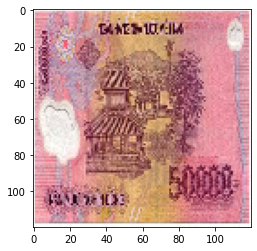

In [106]:
pic = image.load_img('/content/drive/MyDrive/AI/11_LoaiTien/50k.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [107]:
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loai tien: 100k")
if guess[0]==1:
  print("Loai tien: 10k")
if guess[0]==2:
  print("Loai tien: 1k")
if guess[0]==3:
  print("Loai tien: 200k")
if guess[0]==4:
  print("Loai tien: 200đ")
if guess[0]==5:
  print("Loai tien: 20k")
if guess[0]==6:
  print("Loai tien: 2k")
if guess[0]==7:
  print("Loai tien: 500k")
if guess[0]==8:
  print("Loai tien: 500đ")
if guess[0]==9:
  print("Loai tien: 50k")
if guess[0]==10:
  print("Loai tien: 5k")

Loai tien: 50k
